In [2]:
!pip install pandas


In [5]:
import pandas as pd


In [63]:
!pip install numpy

In [15]:
!pip install pymongo
        

In [67]:
#a)Create collections “flights” inside database “airline_delayDB”

from pymongo import MongoClient
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns


def mongoimport(csv_path):
        flight_df = pd.read_csv(csv_path)
        payload = json.loads(flight_df.to_json(orient = 'records'))
        collection.delete_many({})
        collection.insert_many(payload)
        
    
if __name__ =="__main__":
    client = MongoClient("mongodb://localhost:27017")
    db = client['airline_delayDB']
    collection = db['flights']
    
    mongoimport('E:/USTpython/pymongo1/Flights_Delay.csv')

In [75]:
#b) Average arrival dealy caused by airlines

a=collection.aggregate([{'$group':{'_id':'null','averagedealy':{'$avg':'$ARRIVAL_DELAY'}}},{'$project':{'_id':0}}])
for item in a:
    print(item)

{'averagedealy': 7.545457931394093}


,_id,averagedealy
0,1,5.860943
1,3,11.343455
2,2,8.122952


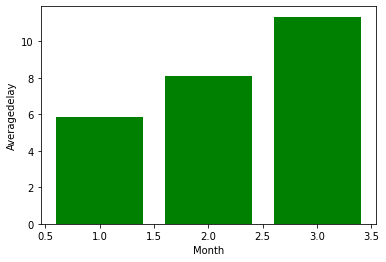

In [86]:
#c)Days of months with respect to average of arrival delay
a=collection.aggregate([{'$group':{'_id':'$MONTH','averagedealy':{'$avg':'$ARRIVAL_DELAY'}}}])

df=pd.DataFrame(a)
display(df)
plt.bar(df['_id'], df['averagedealy'],color="green")
plt.xlabel('Month')
plt.ylabel('Averagedelay')
plt.show()




,_id,averagedealy
0,4,7.174969
1,6,4.888689
2,2,8.033644
3,1,10.807447
4,3,5.587079
5,7,10.110840
6,5,6.010538


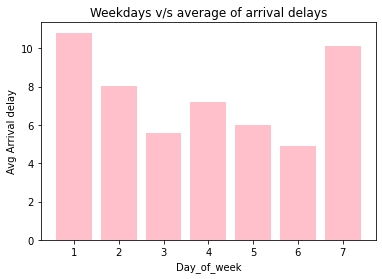

In [92]:
#d)  Arrange weekdays with respect to average of arrival delay  
a=collection.aggregate([{'$group':{'_id':'$DAY_OF_WEEK','averagedealy':{'$avg':'$ARRIVAL_DELAY'}}}])
df=pd.DataFrame(a)
display(df)
plt.bar(df['_id'],df['averagedealy'],color='pink')
plt.title('Weekdays v/s average of arrival delays')
plt.xlabel('Day_of_week')
plt.ylabel('Avg Arrival delay')
plt.show()

In [93]:
#e)Arrange Days of month as per cancellation done in descending order
allDocuments = collection.aggregate([{'$match':{'DAY':1}},{'$group':{'_id':'$CANCELLED','totalcount':{'$count':{}}}},{'$sort':{'totalcount':-1}}])
for item in allDocuments:
              print(item)
         

{'_id': 0, 'totalcount': 2011}
{'_id': 1, 'totalcount': 237}


In [95]:
 #f)Find the busiest airports with respect to day of week
allDocuments = collection.aggregate([{'$match':{'DAY_OF_WEEK':2}},{'$group':{'_id':'null','busiestairport':{'$max':'$ORIGIN_AIRPORT'}}},{'$project':{'_id':0}}])
for item in allDocuments:
    print(item)
         

{'busiestairport': 'YUM'}


In [113]:
#g)Find top 10 airlines of us
allDocuments = collection.aggregate([{'$match':{'AIRLINE':"US"}},{'$sort':{'AIRLINE':-1}},{'$limit':10}])
for item in allDocuments:
    print(item)


{'_id': ObjectId('6363f49401da50698360a94b'), 'ID': 104, 'YEAR': 2015, 'MONTH': 2, 'DAY': 24, 'DAY_OF_WEEK': 2, 'AIRLINE': 'US', 'FLIGHT_NUMBER': 879, 'TAIL_NUMBER': 'N176UW', 'ORIGIN_AIRPORT': 'PVD', 'DESTINATION_AIRPORT': 'CLT', 'SCHEDULED_DEPARTURE': 800, 'DEPARTURE_TIME': 751.0, 'DEPARTURE_DELAY': -9.0, 'TAXI_OUT': 39.0, 'WHEELS_OFF': 830.0, 'SCHEDULED_TIME': 148, 'ELAPSED_TIME': 174.0, 'AIR_TIME': 115.0, 'DISTANCE': 683, 'WHEELS_ON': 1025.0, 'TAXI_IN': 20.0, 'SCHEDULED_ARRIVAL': 1028, 'ARRIVAL_TIME': 1045.0, 'ARRIVAL_DELAY': 17.0, 'DIVERTED': 0, 'CANCELLED': 0, 'CANCELLATION_REASON': None, 'AIR_SYSTEM_DELAY': 17.0, 'SECURITY_DELAY': 0.0, 'AIRLINE_DELAY': 0.0, 'LATE_AIRCRAFT_DELAY': 0.0, 'WEATHER_DELAY': 0.0}
{'_id': ObjectId('6363f49401da50698360a94c'), 'ID': 105, 'YEAR': 2015, 'MONTH': 3, 'DAY': 4, 'DAY_OF_WEEK': 3, 'AIRLINE': 'US', 'FLIGHT_NUMBER': 1777, 'TAIL_NUMBER': 'N712US', 'ORIGIN_AIRPORT': 'DCA', 'DESTINATION_AIRPORT': 'RSW', 'SCHEDULED_DEPARTURE': 1530, 'DEPARTURE_TIME':

In [114]:
#h)Finding airlines that make the maximum, minimum number of cancellations.
allDocuments = collection.aggregate([{'$group':{'_id':'null','maxcancel':{'$max':'$CANCELLED'},'mincancel':{'$min':'$CANCELLED'}}},{'$project':{'_id':0}}])
for item in allDocuments:
    print(item)

{'maxcancel': 1, 'mincancel': 0}


In [117]:
#i)Find and show airlines names in descending that make the most number of diversions made         
s = collection.aggregate([{'$match':{'DIVERTED':1}},{'$group':{'_id':'$AIRLINE','totalcount':{'$count':{}}}},{'$sort':{'totalcount':-1}}])
for item in s:
    print(item)
    

{'_id': 'WN', 'totalcount': 35}
{'_id': 'OO', 'totalcount': 25}
{'_id': 'EV', 'totalcount': 22}
{'_id': 'DL', 'totalcount': 18}
{'_id': 'B6', 'totalcount': 16}
{'_id': 'AA', 'totalcount': 12}
{'_id': 'US', 'totalcount': 9}
{'_id': 'UA', 'totalcount': 8}
{'_id': 'MQ', 'totalcount': 5}
{'_id': 'HA', 'totalcount': 1}


In [119]:
#j)Finding days of month that see the most number of diversion
d = collection.aggregate([{'$group':{'_id':'$MONTH','Diviton':{'$sum':'$DIVERTED'}}},{'$sort':{'Diviton':-1}},{'$limit':1}])
for item in d:
    print(item)

{'_id': 2, 'Diviton': 60}


In [120]:
#k)Calculating mean and standard deviation of departure delay for all flights in minutes
e = collection.aggregate([{'$group':{'_id':'null', 'depardelay':{'$stdDevSamp':'$DEPARTURE_DELAY'}}}])
for item in e:
    print(item)

{'_id': 'null', 'depardelay': 39.62091603371482}


In [121]:
#l)Calculating mean and standard deviation of arrival delay for all flights in minutes
f = collection.aggregate([{'$group':{'_id':'null', 'arrivaldelay':{'$stdDevSamp':'$ARRIVAL_DELAY'}}}])
for item in f:
    print(item)

{'_id': 'null', 'arrivaldelay': 42.37838582463237}
